In [46]:
#Importing impotant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [47]:
cpi_hist = pd.read_csv('CPI_HistoryMar_23.csv')
cpi_hist.head(5)

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4


In [48]:
# Pivot the DataFrame
cpi_pivot = cpi_hist.pivot(index= 'Month', columns= 'Category', values= 'Value')

# Reset the index if needed (to make 'Month' a regular column)
cpi_pivot = cpi_pivot.reset_index()

In [49]:
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'])
cpi_pivot = cpi_pivot.sort_values('Month').reset_index(drop= True)

In [50]:
cpi_pivot

Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


In [51]:
date_str = '2023-04-30'
date_obj = pd.to_datetime(date_str)
new_row = pd.DataFrame({'Month':[date_obj]})
cpi_pivot =pd.concat([cpi_pivot, new_row]).reset_index(drop= True)

In [52]:
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


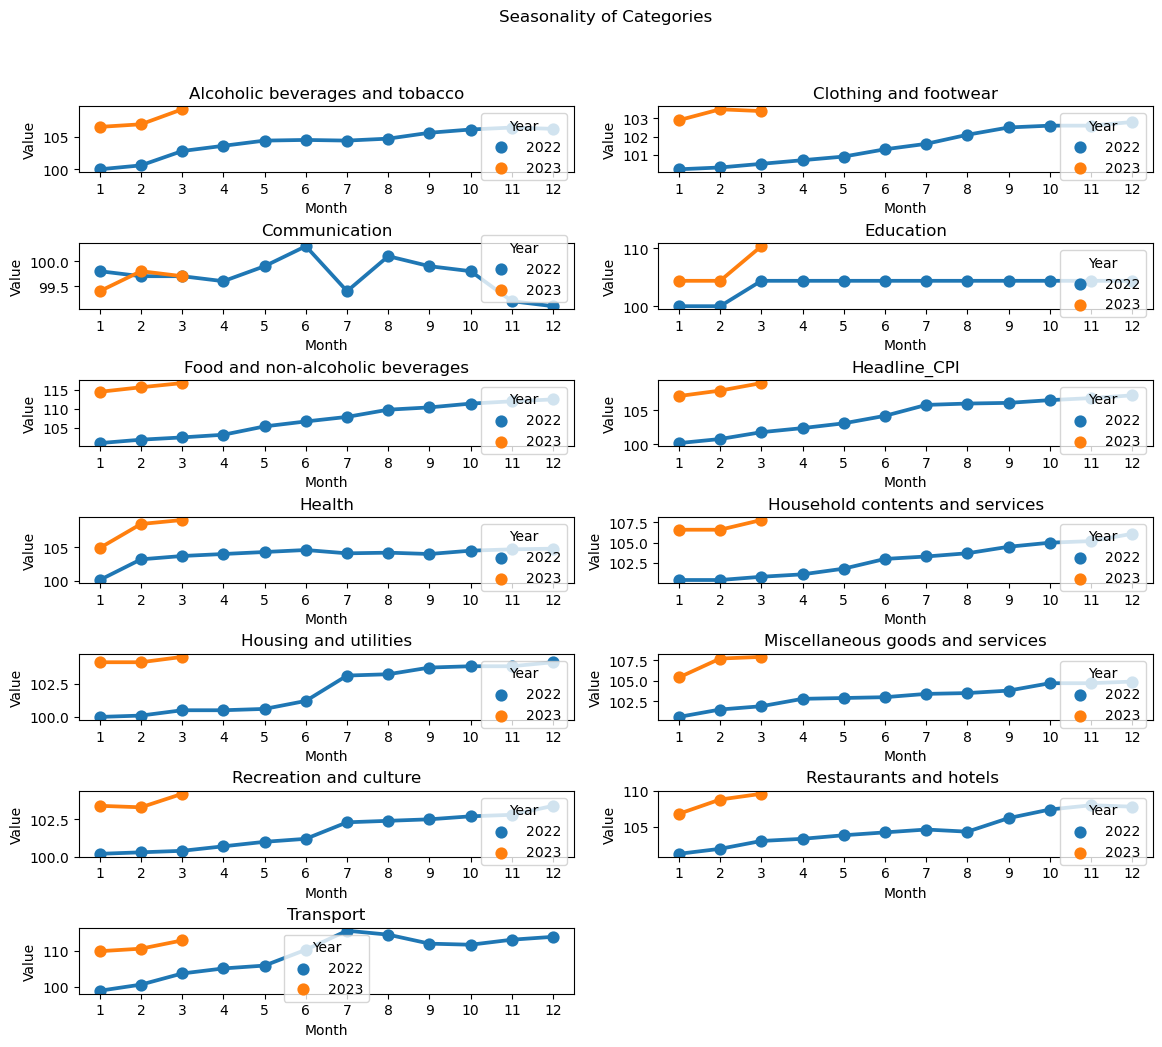

In [53]:
# Create a temporary dataframe with Month and Year columns
df_temp = cpi_pivot.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp['Month']).year
df_temp['Month'] = pd.DatetimeIndex(df_temp['Month']).month

# Define the categories to plot
categories_to_plot = cpi_pivot.columns[1:]

# Create subplots
num_categories = len(categories_to_plot)
num_rows = math.ceil(num_categories / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over each category and plot its seasonality
for i, category in enumerate(categories_to_plot):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.pointplot(x='Month', y=category, hue='Year', data=df_temp, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Hide any unused subplots
for i in range(num_categories, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.axis('off')

plt.suptitle('Seasonality of Categories', y=1.05)
plt.show()

# Featuring Engineering 

In [54]:
#Lagging 

feats_to_lag = cpi_pivot.columns[1:].to_list()
for col in feats_to_lag:
    for i in range(1, 2):
        cpi_pivot[f"prev_{i}_month_{col})"] = cpi_pivot[col].shift(i)


In [55]:
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,...,prev_1_month_Education),prev_1_month_Food and non-alcoholic beverages),prev_1_month_Headline_CPI),prev_1_month_Health),prev_1_month_Household contents and services),prev_1_month_Housing and utilities),prev_1_month_Miscellaneous goods and services),prev_1_month_Recreation and culture),prev_1_month_Restaurants and hotels ),prev_1_month_Transport)
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,...,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,...,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,...,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,...,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,...,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,...,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,...,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,...,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,...,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0


In [56]:
cpi_pivot = cpi_pivot.drop(0)

In [68]:
cpi_pivot.to_csv('cleaned_data.csv', index=False)

# 1) How has the Consumer Price Index (Headline CPI) changed over the first four months of 2022?

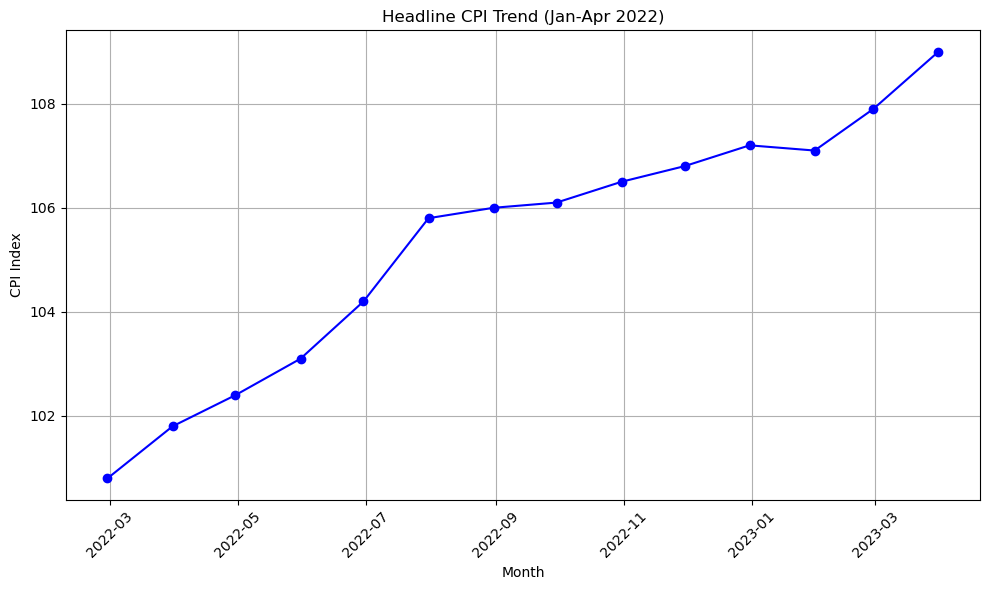

In [57]:
df = pd.DataFrame(cpi_pivot)

# Create a line plot for the Headline CPI
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Headline_CPI'], marker='o', linestyle='-', color='b')
plt.title('Headline CPI Trend (Jan-Apr 2022)')
plt.xlabel('Month')
plt.ylabel('CPI Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# 2) Which categories have experienced the highest and lowest inflation rates in this period?

In [58]:
df = pd.DataFrame(cpi_pivot)

# Calculate inflation rates for each category
inflation_rates = {}

for column in df.columns:
    if column != 'Month' and column != 'Headline_CPI':
        inflation_rate = ((df[column] - df[column].shift(1)) / df[column].shift(1)) * 100
        inflation_rates[column] = inflation_rate

# Find the category with the highest and lowest inflation rates
highest_inflation_category = None
lowest_inflation_category = None
max_inflation_rate = -float('inf')
min_inflation_rate = float('inf')

for category, inflation_rate in inflation_rates.items():
    if inflation_rate.iloc[-1] > max_inflation_rate:
        max_inflation_rate = inflation_rate.iloc[-1]
        highest_inflation_category = category
    if inflation_rate.iloc[-1] < min_inflation_rate:
        min_inflation_rate = inflation_rate.iloc[-1]
        lowest_inflation_category = category

print("Category with the highest inflation rate:", highest_inflation_category)
print("Category with the lowest inflation rate:", lowest_inflation_category)


Category with the highest inflation rate: prev_1_month_Education)
Category with the lowest inflation rate: prev_1_month_Communication)


# 3)How have the prices for Education changed compared to the overall CPI trend?

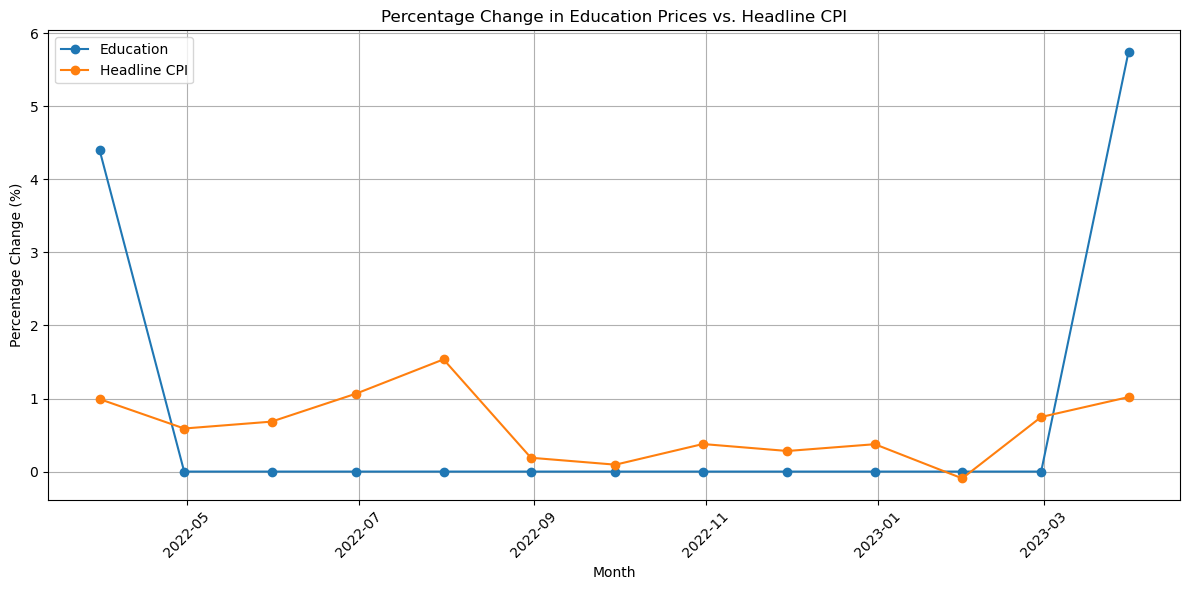

In [59]:
df = pd.DataFrame(cpi_pivot)

# Calculate percentage change for Education and Headline CPI
df['Education_pct_change'] = ((df['Education'] - df['Education'].shift(1)) / df['Education'].shift(1)) * 100
df['Headline_CPI_pct_change'] = ((df['Headline_CPI'] - df['Headline_CPI'].shift(1)) / df['Headline_CPI'].shift(1)) * 100

# Plot the percentage change in Education prices compared to Headline CPI
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Education_pct_change'], label='Education', marker='o')
plt.plot(df['Month'], df['Headline_CPI_pct_change'], label='Headline CPI', marker='o')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Education Prices vs. Headline CPI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5)What is the trend in the prices of Food and non-alcoholic beverages from January to April 2022?

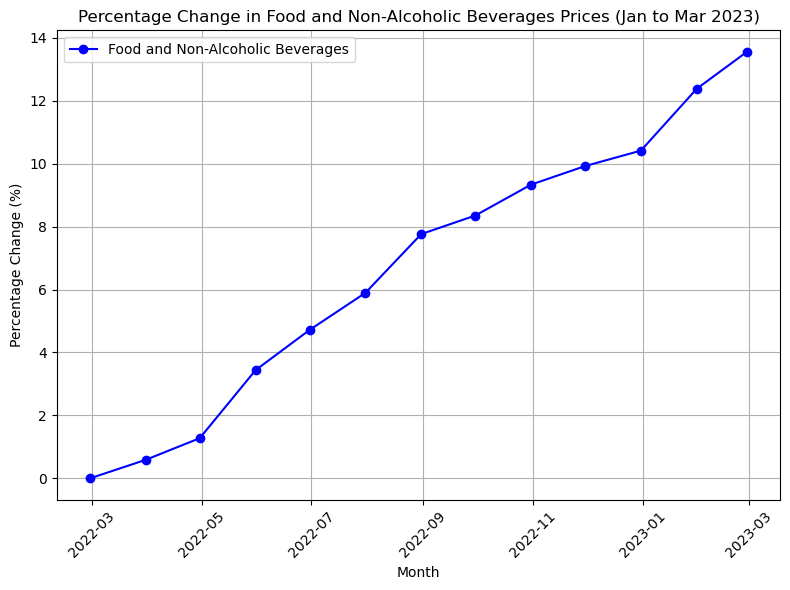

In [60]:
df = pd.DataFrame(cpi_pivot)

# Filter the data for January to April 2022
start_date = '2022-01-31'
end_date = '2023-03-30'
filtered_df = df[(df['Month'] >= start_date) & (df['Month'] <= end_date)]

# Calculate percentage change for Food and non-alcoholic beverages
filtered_df['Food_pct_change'] = ((filtered_df['Food and non-alcoholic beverages'] - filtered_df['Food and non-alcoholic beverages'].iloc[0]) / filtered_df['Food and non-alcoholic beverages'].iloc[0]) * 100

# Plot the percentage change in Food and non-alcoholic beverages prices
plt.figure(figsize=(8, 6))
plt.plot(filtered_df['Month'], filtered_df['Food_pct_change'], label='Food and Non-Alcoholic Beverages', marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Food and Non-Alcoholic Beverages Prices (Jan to Mar 2023)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


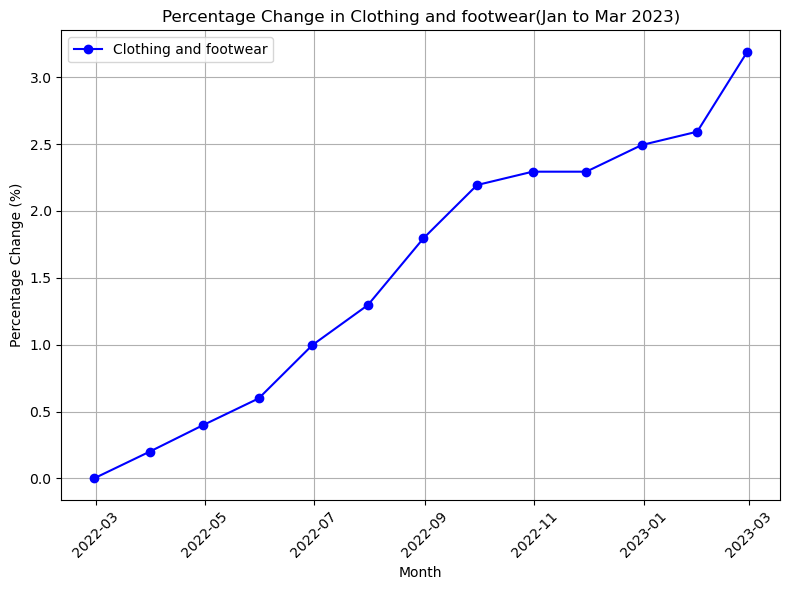

In [74]:
df = pd.DataFrame(cpi_pivot)

# Filter the data for January to April 2022
start_date = '2022-01-31'
end_date = '2023-03-30'
filtered_df = df[(df['Month'] >= start_date) & (df['Month'] <= end_date)]

# Calculate percentage change for Food and non-alcoholic beverages
filtered_df['Clothing and footwear'] = ((filtered_df['Clothing and footwear'] - filtered_df['Clothing and footwear'].iloc[0]) / filtered_df['Clothing and footwear'].iloc[0]) * 100

# Plot the percentage change in Food and non-alcoholic beverages prices
plt.figure(figsize=(8, 6))
plt.plot(filtered_df['Month'], filtered_df['Clothing and footwear'], label='Clothing and footwear', marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.title('Percentage Change in Clothing and footwear(Jan to Mar 2023)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6) How do the inflation rates for Health and Miscellaneous goods and services compare over time?

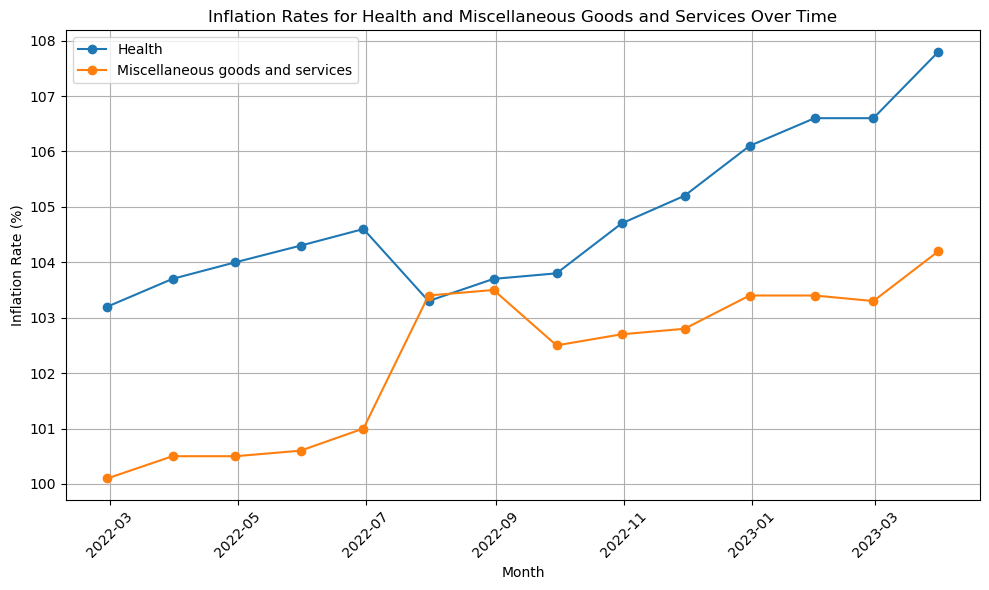

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with your dataset

# Extract the 'Month' column and the columns for Health and Miscellaneous goods and services
months = pd.to_datetime(df['Month'])
health_inflation = df['Health']
miscellaneous_inflation = df['Miscellaneous goods and services']

# Create a line plot for Health
plt.figure(figsize=(10, 6))
plt.plot(months, health_inflation, label='Health', marker='o')

# Create a line plot for Miscellaneous goods and services
plt.plot(months, miscellaneous_inflation, label='Miscellaneous goods and services', marker='o')

# Customize the plot
plt.title('Inflation Rates for Health and Miscellaneous Goods and Services Over Time')
plt.xlabel('Month')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


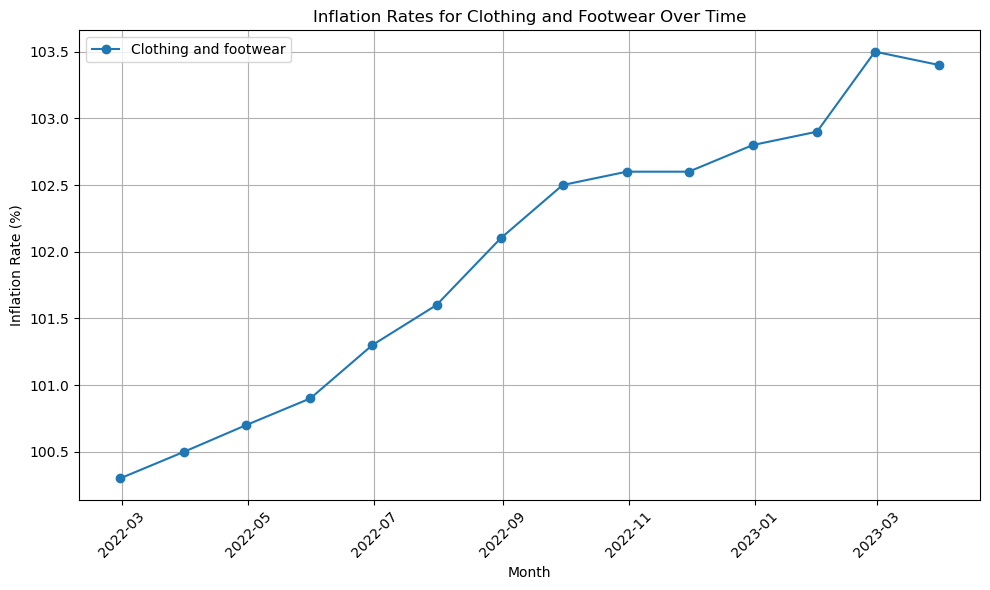

In [67]:
months = pd.to_datetime(df['Month'])
clothing_inflation = df['Clothing and footwear']

# Create a line plot for Clothing and footwear
plt.figure(figsize=(10, 6))
plt.plot(months, clothing_inflation, label='Clothing and footwear', marker='o')

# Customize the plot
plt.title('Inflation Rates for Clothing and Footwear Over Time')
plt.xlabel('Month')
plt.ylabel('Inflation Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()